In [1]:
import matplotlib as plt

%matplotlib inline

from pyFTS.partitioners import CMeans, Grid, FCM, Huarng, Entropy, Util as pUtil
from pyFTS.common import Membership as mf
from pyFTS.benchmarks import benchmarks as bchmk
from pyFTS.data import Enrollments

enrollments = Enrollments.get_data()

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


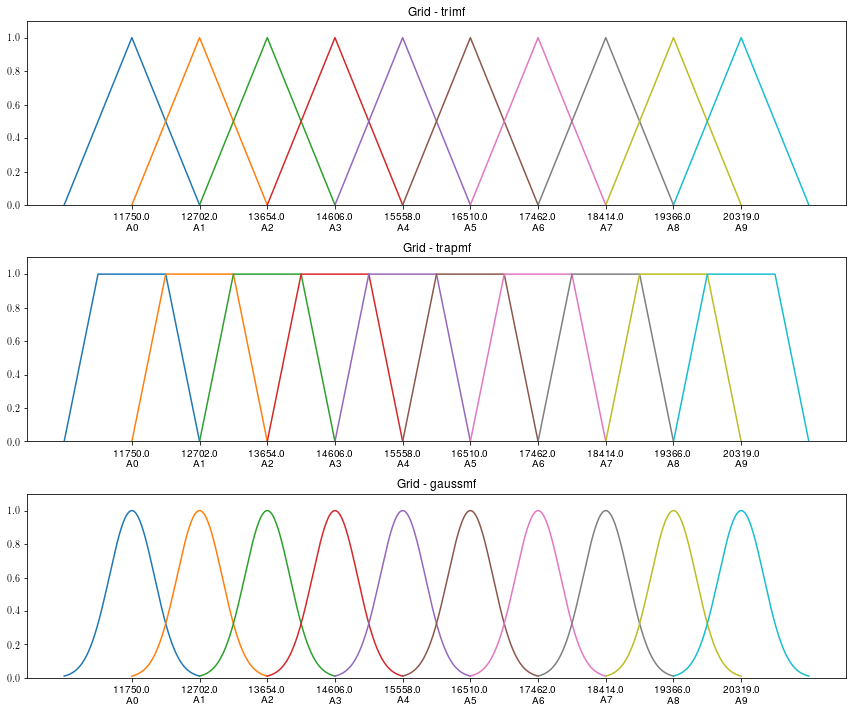

In [2]:
part = pUtil.explore_partitioners(enrollments, 10, methods=[Grid.GridPartitioner], 
                                  mf=[mf.trimf, mf.trapmf, mf.gaussmf])

In [3]:
for p in part:
    print(p)

Grid - trimf:
A0: trimf([10797.38, 11749.5, 12701.62])
A1: trimf([11749.5, 12701.62, 13653.740000000002])
A2: trimf([12701.62, 13653.740000000002, 14605.860000000002])
A3: trimf([13653.740000000002, 14605.860000000002, 15557.980000000003])
A4: trimf([14605.860000000002, 15557.980000000003, 16510.100000000002])
A5: trimf([15557.980000000005, 16510.100000000006, 17462.220000000005])
A6: trimf([16510.100000000006, 17462.220000000005, 18414.340000000004])
A7: trimf([17462.220000000005, 18414.340000000004, 19366.460000000003])
A8: trimf([18414.340000000007, 19366.460000000006, 20318.580000000005])
A9: trimf([19366.46000000001, 20318.58000000001, 21270.700000000008])

Grid - trapmf:
A0: trapmf([10797.38, 11273.44, 12225.56, 12701.62])
A1: trapmf([11749.5, 12225.560000000001, 13177.68, 13653.740000000002])
A2: trapmf([12701.62, 13177.680000000002, 14129.800000000001, 14605.860000000002])
A3: trapmf([13653.740000000002, 14129.800000000003, 15081.920000000002, 15557.980000000003])
A4: trapmf([1

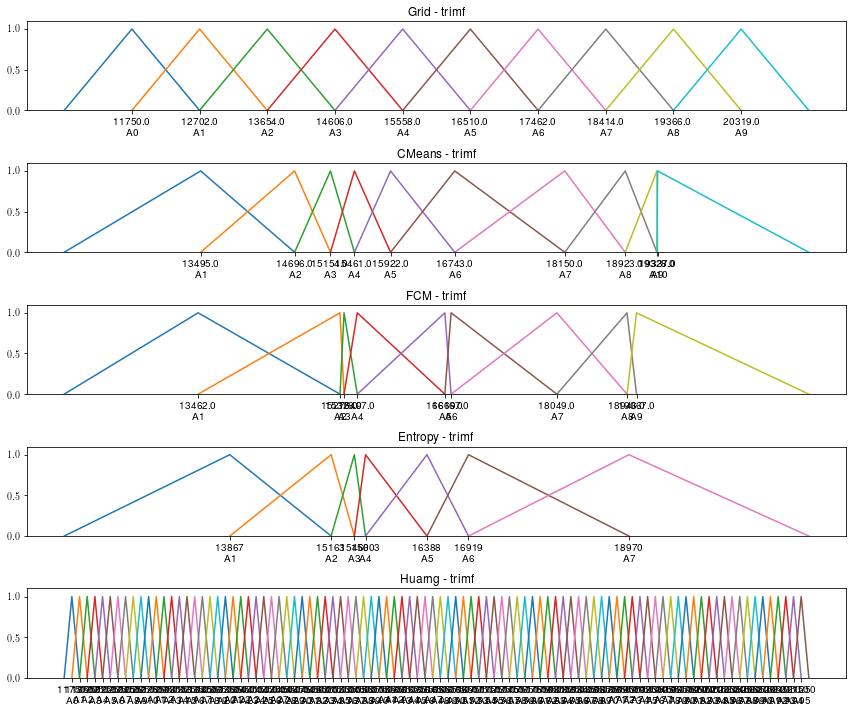

In [4]:
part = pUtil.explore_partitioners(enrollments, 10, methods=[Grid.GridPartitioner, CMeans.CMeansPartitioner, 
                                                           FCM.FCMPartitioner, Entropy.EntropyPartitioner,
                                                           Huarng.HuarngPartitioner], 
                                  mf=[mf.trimf])

In [5]:
for p in part:
    print(p)

Grid - trimf:
A0: trimf([10797.38, 11749.5, 12701.62])
A1: trimf([11749.5, 12701.62, 13653.740000000002])
A2: trimf([12701.62, 13653.740000000002, 14605.860000000002])
A3: trimf([13653.740000000002, 14605.860000000002, 15557.980000000003])
A4: trimf([14605.860000000002, 15557.980000000003, 16510.100000000002])
A5: trimf([15557.980000000005, 16510.100000000006, 17462.220000000005])
A6: trimf([16510.100000000006, 17462.220000000005, 18414.340000000004])
A7: trimf([17462.220000000005, 18414.340000000004, 19366.460000000003])
A8: trimf([18414.340000000007, 19366.460000000006, 20318.580000000005])
A9: trimf([19366.46000000001, 20318.58000000001, 21270.700000000008])

CMeans - trimf:
A1: trimf([11749.5, 13495.0, 14696.0])
A2: trimf([13495.0, 14696.0, 15154.0])
A3: trimf([14696.0, 15154.0, 15460.8])
A4: trimf([15154.0, 15460.8, 15922.5])
A5: trimf([15460.8, 15922.5, 16743.25])
A6: trimf([15922.5, 16743.25, 18150.0])
A7: trimf([16743.25, 18150.0, 18923.0])
A8: trimf([18150.0, 18923.0, 19328.0]